# US M2 Supply Growth at 7.7% annually from 1980 to 2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('/Users/jluan/code/finance/data/fmp_data.db')
def query(sql):
  df = pd.read_sql_query(sql, db)
  return df

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from scipy.optimize import curve_fit

def fit_exponential(x_data, y_data):
    """
    Fit exponential curve y = a * (r^x) + c to data points.
    Returns coefficients (a, r, c) and fitted y values.
    """
    def exp_func(x, a, r, c):
        return a * (r ** x) + c
    
    # Fit curve with initial guess
    # r=1.1 assumes slight growth, adjust if you expect decay (r < 1)
    popt, _ = curve_fit(exp_func, x_data, y_data, 
                       p0=[1.0, 1.02, np.min(y_data)])
    
    # Get fitted values
    a, r, c = popt
    y_fit = exp_func(x_data, a, r, c)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, label='Data', color='black')
    plt.plot(x_data, y_fit, '-', 
            label=f'y = {a:.2f}·({r:.3f}^x) + {c:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return a, r, c, y_fit


In [19]:
m2 = pd.read_csv('../data/M2SL.csv', names=['date', 'm2'], header=1)
m2 = m2[m2['date'] > '1980-01-01']
m2.reset_index(inplace=True, drop=True)
m2.head()

,date,m2
0,1980-02-01,1494.6
1,1980-03-01,1499.8
2,1980-04-01,1502.2
3,1980-05-01,1512.3
4,1980-06-01,1529.2


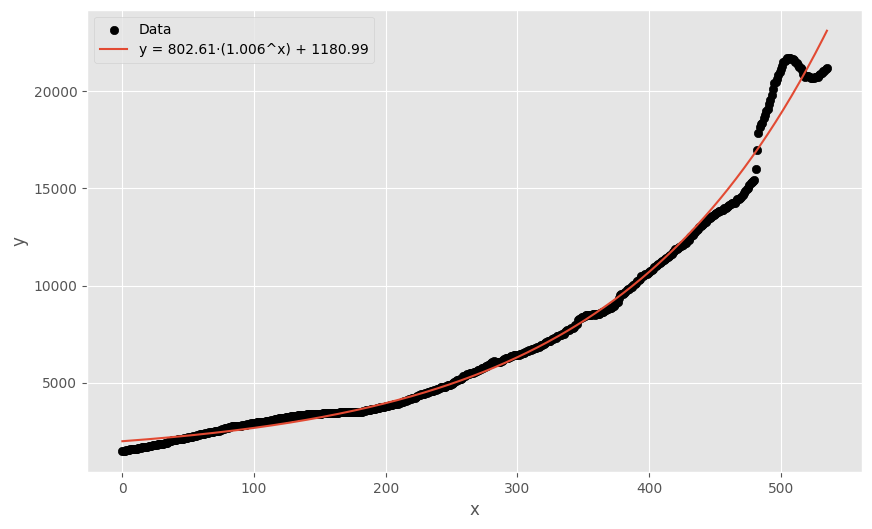

In [20]:
a, r, c, y_fitted = fit_exponential(m2.index, m2.m2.values)

In [50]:
r ** 12 - 1

0.07702314876860772

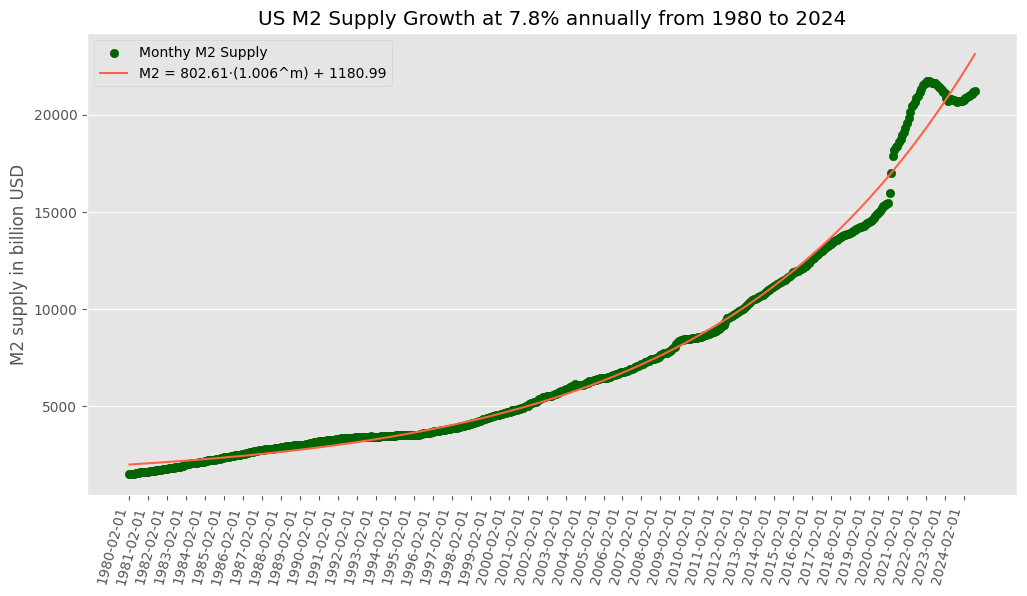

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(m2.index, m2.m2.values, label='Monthy M2 Supply', color='darkgreen')
plt.plot(m2.index, y_fitted, '-', color='tomato',
        label=f'M2 = {a:.2f}·({r:.3f}^m) + {c:.2f}')
plt.xticks(m2.index[::12], m2.date[::12], rotation=75, ha='right')
plt.grid(axis='x')
plt.ylabel('M2 supply in billion USD')
plt.title('US M2 Supply Growth at 7.8% annually from 1980 to 2024')
plt.legend()



In [30]:
m2.date.values[::12]

array(['1980-02-01', '1981-02-01', '1982-02-01', '1983-02-01',
       '1984-02-01', '1985-02-01', '1986-02-01', '1987-02-01',
       '1988-02-01', '1989-02-01', '1990-02-01', '1991-02-01',
       '1992-02-01', '1993-02-01', '1994-02-01', '1995-02-01',
       '1996-02-01', '1997-02-01', '1998-02-01', '1999-02-01',
       '2000-02-01', '2001-02-01', '2002-02-01', '2003-02-01',
       '2004-02-01', '2005-02-01', '2006-02-01', '2007-02-01',
       '2008-02-01', '2009-02-01', '2010-02-01', '2011-02-01',
       '2012-02-01', '2013-02-01', '2014-02-01', '2015-02-01',
       '2016-02-01', '2017-02-01', '2018-02-01', '2019-02-01',
       '2020-02-01', '2021-02-01', '2022-02-01', '2023-02-01',
       '2024-02-01'], dtype=object)